In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Merging 12 months sales data

In [3]:
df = pd.read_csv("./Sales_data/Sales_April_2019.csv")


In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:

fls = os.listdir('./Sales_data/')
print(fls)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [6]:
for fl in fls:
    print(fl)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
all_months_data = pd.DataFrame()
for fl in fls:
    dff = pd.read_csv('./Sales_data/'+fl)
    all_months_data = pd.concat([all_months_data, dff], axis = 0)
print(all_months_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [8]:
all_months_data.to_csv('all_data.csv')
all_data = pd.read_csv('all_data.csv')
print(all_data.head())

   Unnamed: 0 Order ID                     Product Quantity Ordered  \
0           0   176558        USB-C Charging Cable                2   
1           1      NaN                         NaN              NaN   
2           2   176559  Bose SoundSport Headphones                1   
3           3   176560                Google Phone                1   
4           4   176560            Wired Headphones                1   

  Price Each      Order Date                      Purchase Address  
0      11.95  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1        NaN             NaN                                   NaN  
2      99.99  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3        600  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4      11.99  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


### Clean up the Data

###### Drop rows of NAN

In [9]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head(55)
all_data =all_data.dropna(how ='any')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##### Convert columns to correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [12]:
# Augment Data with additional columns
# Add month column

In [13]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype(int)

In [14]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a Sales column

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a city column

In [16]:
# def splt(cnm):
#     k = cnm.split(',')
#     return k[1]

In [17]:
# all_data['City'] = all_data['Purchase Address'].apply(splt)
# all_data.head()
# all_data['State'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[2].split()[0])
# all_data.head()
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{x.split(',')[1]} ( {x.split(',')[2].split()[0] })" )


all_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)


### Best month for sales and earning


In [18]:
results  = all_data.groupby('Month').sum()


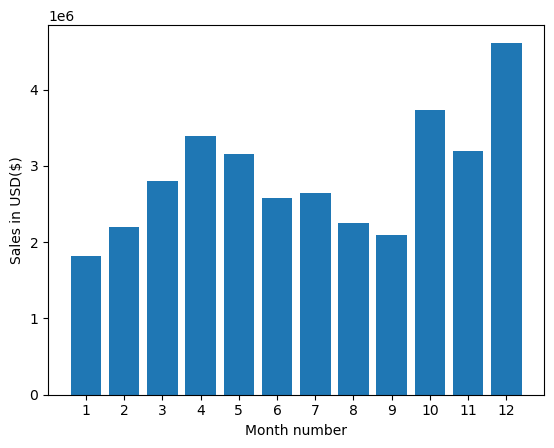

In [19]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

## What city had the highest number of sales

In [20]:
cresults  = all_data.groupby('City').sum()
cresults

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta ( GA),122928154,16602,2779908.20,104794,2795498.58
Austin ( TX),82709457,11153,1809873.61,69829,1819581.75
Boston ( MA),165758780,22528,3637409.77,141112,3661642.01
Dallas ( TX),124308328,16730,2752627.82,104620,2767975.40
Los Angeles ( CA),247743297,33289,5421435.23,208325,5452570.80
New York City ( NY),208439450,27932,4635370.83,175741,4664317.43
Portland ( ME),20641344,2750,447189.25,17144,449758.27
Portland ( OR),83402354,11303,1860558.22,70621,1870732.34
San Francisco ( CA),372569180,50239,8211461.74,315520,8262203.91


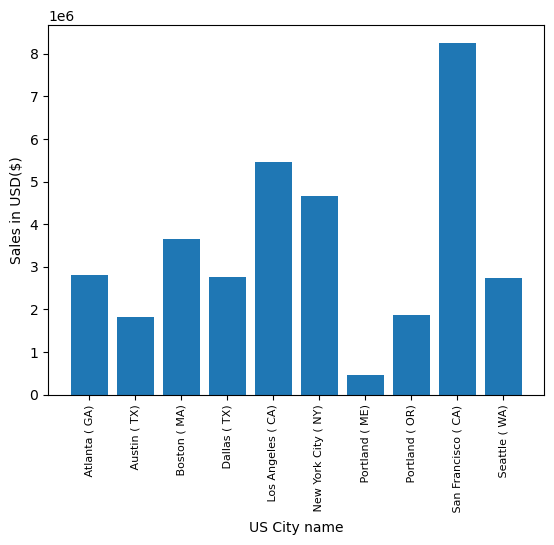

In [21]:
import matplotlib.pyplot as plt

cities = [ city for city, df in all_data.groupby('City')]

plt.bar(cities, cresults['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('US City name')
plt.show()


### What time to display advertisements to maximize the likelihood of customer's buying product?

In [22]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)


In [23]:
# Convert order date into a datetime object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [25]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),9,27


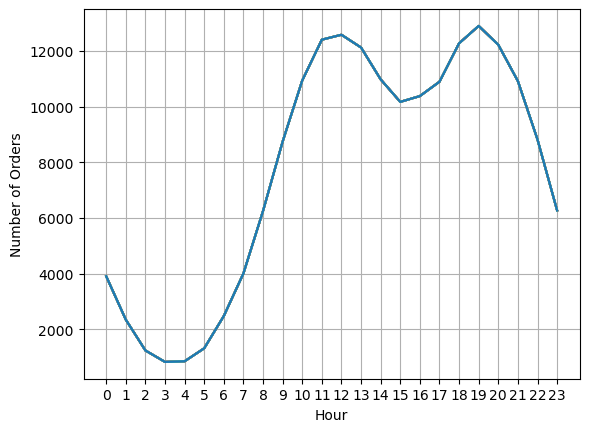

In [26]:
hours = [ hour for hour,df in all_data.groupby('Hour') ]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


### What products are most often sold together?

In [27]:
### Counting all the duplicate order ids which products were sold together the most?

df = all_data[all_data['Order ID'].duplicated(keep=False)]

## We need items with same order id on the same line

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )
 
# Remove duplicated columns

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)


C:\Users\K\AppData\Local\Temp\ipykernel_12100\3388647955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [28]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
# Most common 2
# count.most_common(10)

for key, value in count.most_common(10):
    print(key,value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most?

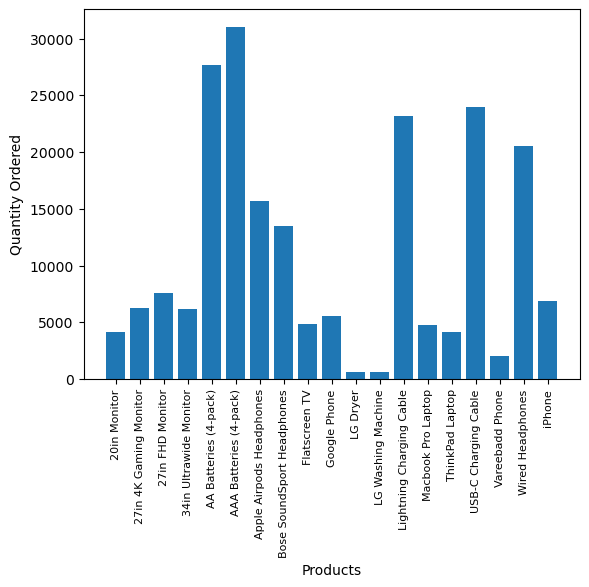

In [29]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [ product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()


C:\Users\K\AppData\Local\Temp\ipykernel_12100\567495395.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


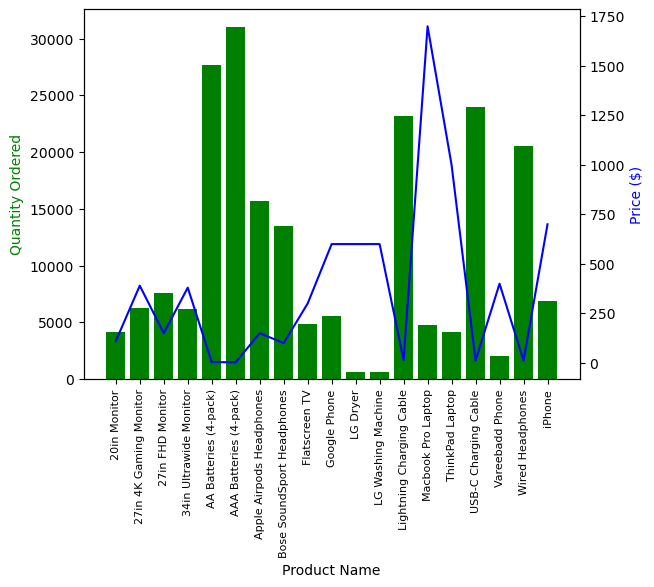

In [39]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()